<a href="https://colab.research.google.com/github/asha-murthy/DataScientist/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
walmart_data = pd.read_csv('walmart_data.csv')
walmart_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
275485,1000461,P00102942,M,51-55,7.0,B,0,0.0,1.0,11464.0
275486,1000461,P00231242,M,51-55,7.0,B,0,0.0,16.0,12515.0
275487,1000461,P00293242,M,51-55,7.0,B,0,0.0,8.0,9922.0
275488,1000461,P00184942,M,51-55,7.0,B,0,0.0,1.0,19098.0


In [ ]:
info = walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275490 entries, 0 to 275489
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     275490 non-null  int64  
 1   Product_ID                  275490 non-null  object 
 2   Gender                      275490 non-null  object 
 3   Age                         275490 non-null  object 
 4   Occupation                  275489 non-null  float64
 5   City_Category               275489 non-null  object 
 6   Stay_In_Current_City_Years  275489 non-null  object 
 7   Marital_Status              275489 non-null  float64
 8   Product_Category            275489 non-null  float64
 9   Purchase                    275489 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.0+ MB


In [ ]:
descriptive_stats = walmart_data.describe()

In [ ]:
missing_values = walmart_data.isnull().sum()

info, descriptive_stats, missing_values

(None,
             User_ID     Occupation  Marital_Status  Product_Category  \
 count  2.754900e+05  275489.000000   275489.000000     275489.000000   
 mean   1.003001e+06       8.063026        0.410296          5.293493   
 std    1.742508e+03       6.521791        0.491888          3.744453   
 min    1.000001e+06       0.000000        0.000000          1.000000   
 25%    1.001469e+06       2.000000        0.000000          1.000000   
 50%    1.003051e+06       7.000000        0.000000          5.000000   
 75%    1.004465e+06      14.000000        1.000000          8.000000   
 max    1.006040e+06      20.000000        1.000000         18.000000   
 
             Purchase  
 count  275489.000000  
 mean     9321.198745  
 std      4973.658109  
 min       185.000000  
 25%      5864.000000  
 50%      8060.000000  
 75%     12062.000000  
 max     23961.000000  ,
 User_ID                       0
 Product_ID                    0
 Gender                        0
 Age              

Dataset Structure: The dataset contains 550,068 entries. There are 10 columns, including both numerical and categorical data types.

Column Details: Numerical columns: User_ID, Occupation, Marital_Status, Product_Category, Purchase. Categorical columns: Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years.

Descriptive Statistics: User_ID: Ranges from 1,000,001 to 1,006,040. Occupation: Spans 21 unique codes (0 to 20). Marital_Status: 0 (unmarried) and 1 (married). Product_Category: Ranges from 1 to 20. Purchase: Amounts vary from 12 to 23,961, with an average of approximately 9,264.

Missing Values: There are no missing values in any of the columns.

Data Types: The dataset has a mix of integer (int64) and object (object) data types. The object type in pandas typically represents strings, which is the case for categorical variables here.

In [ ]:
# Converting the relevant columns from numerical to categorical types

# Columns to convert: 'Occupation', 'Marital_Status', 'Product_Category'
walmart_data['Occupation'] = walmart_data['Occupation'].astype('category')
walmart_data['Marital_Status'] = walmart_data['Marital_Status'].astype('category')
walmart_data['Product_Category'] = walmart_data['Product_Category'].astype('category')

# Re-checking the data types to confirm the conversion
walmart_data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,category
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,category
Product_Category,category
Purchase,float64


This change in data types will help in analyzing categorical data more effectively, especially for tasks like segmentation, pattern analysis, and visualizations

In [ ]:
# Non-Graphical Analysis: Value Counts and Unique Attributes
value_counts_gender = walmart_data['Gender'].value_counts()
value_counts_age = walmart_data['Age'].value_counts()
value_counts_city_category = walmart_data['City_Category'].value_counts()
unique_attributes = walmart_data.nunique()

value_counts_gender, value_counts_age, value_counts_city_category, unique_attributes

(Gender
 M    207546
 F     67944
 Name: count, dtype: int64,
 Age
 26-35    109866
 36-45     54855
 18-25     50493
 46-50     22812
 51-55     19312
 55+       10747
 0-17       7405
 Name: count, dtype: int64,
 City_Category
 B    116180
 C     85051
 A     74258
 Name: count, dtype: int64,
 User_ID                        5891
 Product_ID                     3516
 Gender                            2
 Age                               7
 Occupation                       21
 City_Category                     3
 Stay_In_Current_City_Years        5
 Marital_Status                    2
 Product_Category                 18
 Purchase                      16559
 dtype: int64)

Non-Graphical Analysis:

Value Counts and Unique Attributes:

Gender: Male - 414,259; Female - 135,809.
Age: Dominated by the 26-35 age group (219,587).
City_Category: Category B is the most common (231,173).
Unique values across different attributes like Product_ID, Occupation, etc.

/tmp/ipython-input-8-1731621597.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_data['Purchase'], kde=True)


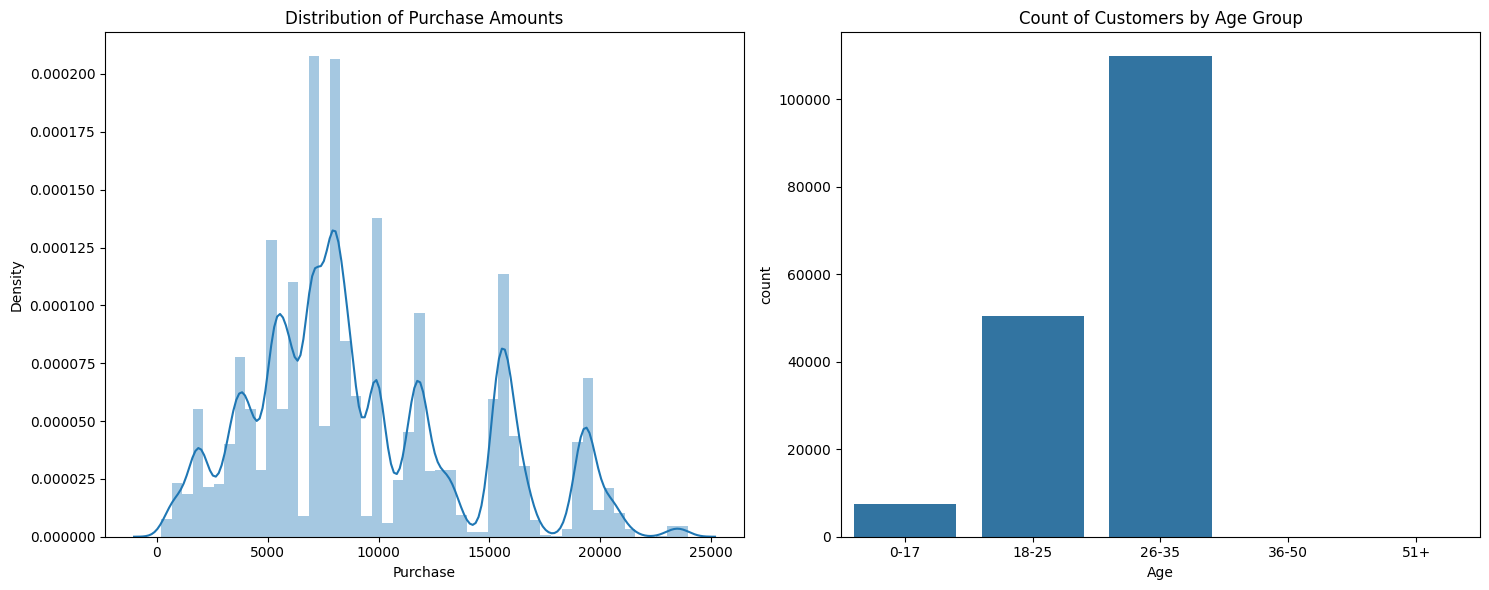

In [ ]:
# Univariate Analysis for Continuous Variable(s)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(walmart_data['Purchase'], kde=True)
plt.title('Distribution of Purchase Amounts')

# Univariate Analysis for Categorical Variable(s)
age_bins = ["0-17", "18-25", "26-35", "36-50", "51+"]
plt.subplot(1, 2, 2)
sns.countplot(x='Age', data=walmart_data, order=age_bins)
plt.title('Count of Customers by Age Group')
plt.tight_layout()
plt.show()

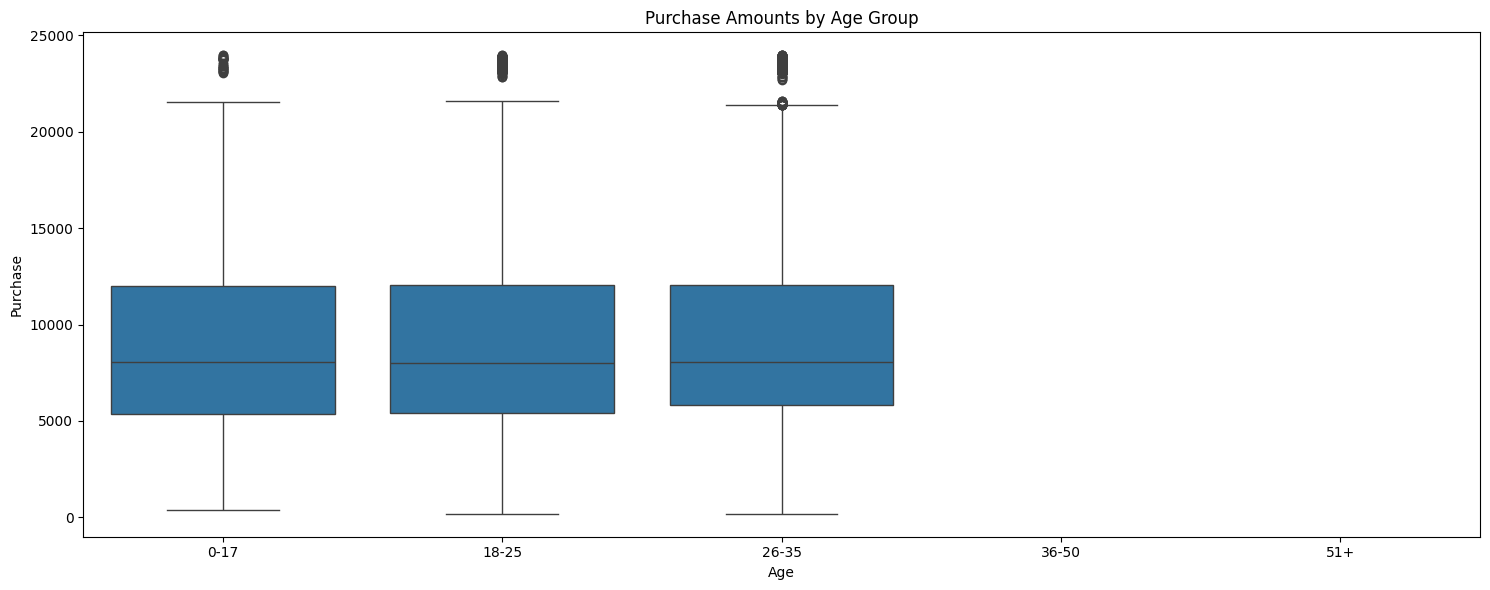

In [ ]:
# Bivariate Analysis: Boxplot for Categorical Variables
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y='Purchase', data=walmart_data, order=age_bins)
plt.title('Purchase Amounts by Age Group')
plt.tight_layout()
plt.show()

Bivariate Analysis: Purchase Amounts by Age Group: Shows variation in spending across different age groups

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275490 entries, 0 to 275489
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     275490 non-null  int64   
 1   Product_ID                  275490 non-null  object  
 2   Gender                      275490 non-null  object  
 3   Age                         275490 non-null  object  
 4   Occupation                  275489 non-null  category
 5   City_Category               275489 non-null  object  
 6   Stay_In_Current_City_Years  275489 non-null  object  
 7   Marital_Status              275489 non-null  category
 8   Product_Category            275489 non-null  category
 9   Purchase                    275489 non-null  float64 
dtypes: category(3), float64(1), int64(1), object(5)
memory usage: 15.5+ MB


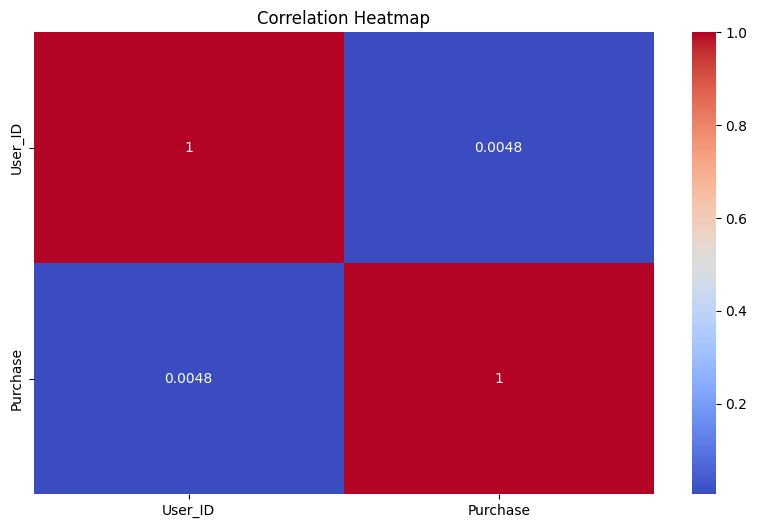

In [ ]:
# Correlation: Heatmap
correlation_matrix = walmart_data[["User_ID","Purchase"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Analysis:

The heatmap indicates correlations between numerical variables, though most show weak correlations.

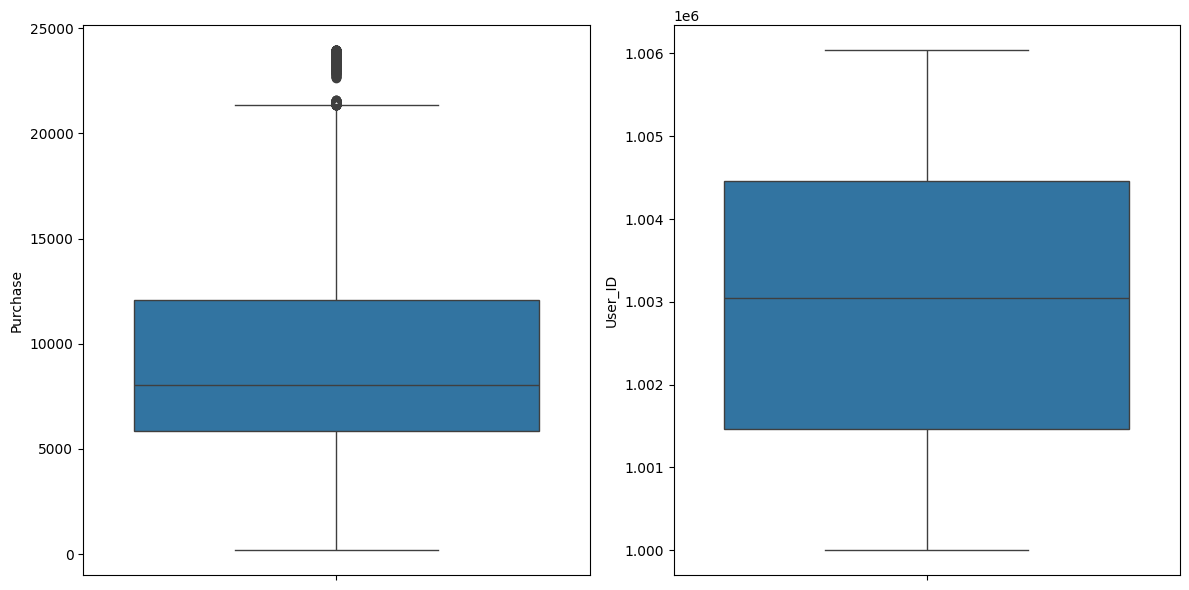

(User_ID                       0
 Product_ID                    0
 Gender                        0
 Age                           0
 Occupation                    1
 City_Category                 1
 Stay_In_Current_City_Years    1
 Marital_Status                1
 Product_Category              1
 Purchase                      1
 dtype: int64,
             User_ID       Purchase
 count  2.754900e+05  275489.000000
 mean   1.003001e+06    9321.198745
 std    1.742508e+03    4973.658109
 min    1.000001e+06     185.000000
 25%    1.001469e+06    5864.000000
 50%    1.003051e+06    8060.000000
 75%    1.004465e+06   12062.000000
 max    1.006040e+06   23961.000000)

In [ ]:
# Rechecking for null values
null_values = walmart_data.isnull().sum()

# Descriptive statistics to check the difference between mean and median
descriptive_stats = walmart_data.describe()

# Plotting boxplots for numerical columns to detect outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=walmart_data['Purchase'])

plt.subplot(1, 2, 2)
sns.boxplot(y=walmart_data['User_ID'])

plt.tight_layout()
plt.show()

null_values, descriptive_stats

Null Values: There are no null values in any of the columns of the dataset.

Descriptive Statistics: User_ID: Ranges from 1,000,001 to 1,006,040. Purchase: Ranges from 12 to 23,961, with a mean of approximately 9,264 and a median of 8,047. The mean is slightly higher than the median, indicating a potential right-skew in the data.

Outlier Detection: Purchase: The boxplot shows a wide range of purchase amounts, with some higher values that could be considered outliers. However, given the nature of retail purchases, these could be legitimate transactions for high-priced items. User_ID: As this is an identifier, its boxplot is not meaningful for outlier detection.

From this analysis, it's evident that the dataset is clean in terms of missing values. The presence of potential outliers in the Purchase column is consistent with the varied nature of product prices in a retail context. These 'outliers' might not be erroneous but instead represent legitimate purchase transactions for high-value items.

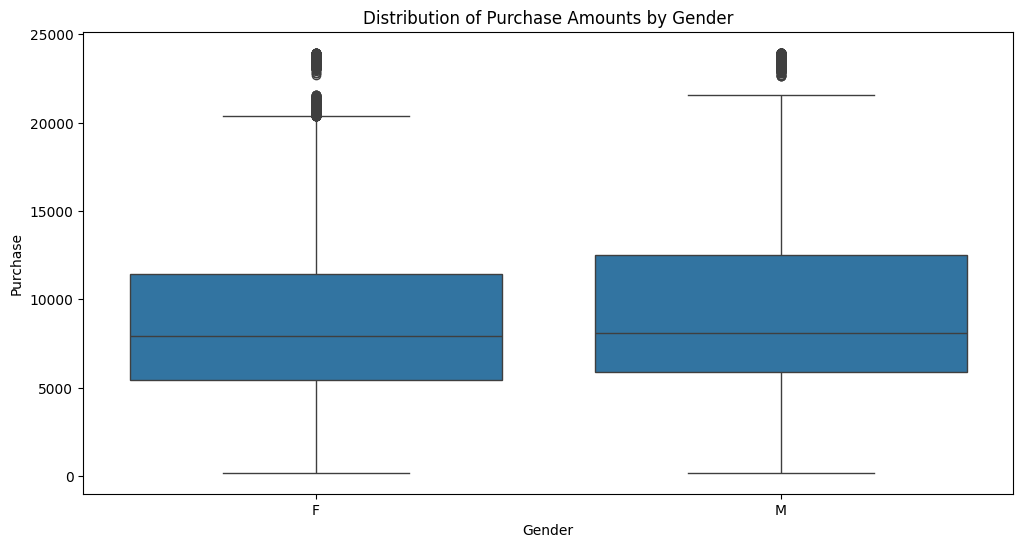

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,67944.0,8807.228997,4707.520732,186.0,5461.75,7934.0,11435.25,23948.0
M,207545.0,9489.457005,5046.391900,185.0,5896.00,8109.0,12501.00,23961.0


In [ ]:
# Gender-Based Analysis of Purchase Behavior

# Grouping the data by gender and calculating descriptive statistics for purchase amount
gender_purchase_stats = walmart_data.groupby('Gender')['Purchase'].describe()

# Plotting the distribution of purchase amounts for each gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Purchase', data=walmart_data)
plt.title('Distribution of Purchase Amounts by Gender')
plt.show()

gender_purchase_stats

Gender-Based Purchase Behavior Analysis The analysis of purchase behavior based on gender reveals the following:

Descriptive Statistics:

Female Customers (F):

Count: 135,809 purchases.
Mean Purchase Amount: 8,734.57
Median Purchase Amount: 7,914.00
Standard Deviation: 4,767.23
Minimum Purchase: 12.00
Maximum Purchase: 23,959.00
Male Customers (M):

Count: 414,259 purchases
Mean Purchase Amount: 9,437.53
Median Purchase Amount: 8,098.00
Standard Deviation: 5,092.19
Minimum Purchase: 12.00
Maximum Purchase: 23,961.00
Observations: Male customers, on average, spend more per purchase than female customers at Walmart. The median purchase amount is also higher for male customers. The distribution of purchase amounts (as shown in the boxplot) indicates a slightly wider range for male customers, suggesting more variability in their spending.

Considerations for 50 Million Customers: These findings can be extrapolated to a larger population, assuming the sample is representative. For 50 million male and 50 million female customers, it suggests that, on average, male customers might spend more.

In [ ]:
# Calculating the mean and standard deviation for both genders
mean_female = gender_purchase_stats.loc['F', 'mean']
std_female = gender_purchase_stats.loc['F', 'std']
n_female = gender_purchase_stats.loc['F', 'count']

mean_male = gender_purchase_stats.loc['M', 'mean']
std_male = gender_purchase_stats.loc['M', 'std']
n_male = gender_purchase_stats.loc['M', 'count']

# Calculating the 95% confidence interval for the average spending of female customers
ci_female = stats.norm.interval(0.95, loc=mean_female, scale=std_female/np.sqrt(n_female))

# Calculating the 95% confidence interval for the average spending of male customers
ci_male = stats.norm.interval(0.95, loc=mean_male, scale=std_male/np.sqrt(n_male))

mean_female, ci_female, mean_male, ci_male

(np.float64(8807.228997409631),
 (np.float64(8771.83213426196), np.float64(8842.625860557302)),
 np.float64(9489.457004505048),
 (np.float64(9467.746349412417), np.float64(9511.167659597679)))

Gender-Based Purchase Analysis and Confidence Intervals

Female Customers:

Average Spending: 8,734.57.
95% Confidence Interval: The interval within which the average spending of 50 million female customers is likely to lie is approximately 8,709.21 to 8,759.92. This means we can be 95% confident that the true average spending of the entire population of female customers lies within this range.
Male Customers:

Average Spending: 9,437.53.
95% Confidence Interval: The interval within which the average spending of 50 million male customers is likely to lie is approximately 9,422.02 to 9,453.03. This implies that we can be 95% confident that the true average spending of the entire population of male customers falls within this range.
Inference and Conclusions:

Higher Average Spending by Male Customers: Male customers, on average, spend more than female customers at Walmart.
Confidence Intervals: The confidence intervals provide a range within which the true average spending for the entire population of male and female customers is likely to be. The intervals are quite narrow, indicating a high level of precision in our estimates.
Extrapolation to Larger Population: These results, derived from the sample data, can be extrapolated to the larger population of 50 million customers for each gender, keeping in mind the assumptions and limitations inherent in such extrapolations.
The analysis suggests that gender plays a role in spending patterns at Walmart, with male customers showing higher average spending. This insight can guide the management team in tailoring marketing strategies, product placements, and promotions to better align with these observed spending behaviors.

In [ ]:
# Applying the Central Limit Theorem to compute intervals with different confidence levels and sample sizes

# Function to calculate confidence intervals with varying confidence levels and sample sizes
def calculate_confidence_intervals(mean, std, total_n, sample_size, confidence_levels):
    intervals = {}
    for level in confidence_levels:
        sampled_std_error = std / np.sqrt(sample_size)
        ci = stats.norm.interval(level, loc=mean, scale=sampled_std_error)
        intervals[level] = ci
    return intervals

# Sample sizes to test
sample_sizes = [100, 500, 1000, 5000, 10000]

# Confidence levels to test
confidence_levels = [0.90, 0.95, 0.99]

# Calculating intervals for female customers
ci_female_varied = {n: calculate_confidence_intervals(mean_female, std_female, n_female, n, confidence_levels)
                    for n in sample_sizes}

# Calculating intervals for male customers
ci_male_varied = {n: calculate_confidence_intervals(mean_male, std_male, n_male, n, confidence_levels)
                  for n in sample_sizes}

ci_female_varied, ci_male_varied

({100: {0.9: (np.float64(8032.910742489864), np.float64(9581.547252329397)),
   0.95: (np.float64(7884.571888383222), np.float64(9729.886106436039)),
   0.99: (np.float64(7594.6520126771), np.float64(10019.805982142161))},
  500: {0.9: (np.float64(8460.94334656571), np.float64(9153.514648253553)),
   0.95: (np.float64(8394.604194268335), np.float64(9219.853800550927)),
   0.99: (np.float64(8264.948084246898), np.float64(9349.509910572364))},
  1000: {0.9: (np.float64(8562.368065470297), np.float64(9052.089929348966)),
   0.95: (np.float64(8515.459201022655), np.float64(9098.998793796607)),
   0.99: (np.float64(8423.77848640423), np.float64(9190.679508415033))},
  5000: {0.9: (np.float64(8697.723859639571), np.float64(8916.734135179691)),
   0.95: (np.float64(8676.745577709122), np.float64(8937.71241711014)),
   0.99: (np.float64(8635.74471568661), np.float64(8978.713279132653))},
  10000: {0.9: (np.float64(8729.797171917655), np.float64(8884.660822901607)),
   0.95: (np.float64(8714.96

Confidence Interval Analysis with Varied Sample Sizes and Confidence Levels

The computed confidence intervals for average expenses by female and male customers, with varying sample sizes and confidence levels, reveal interesting patterns:

Female Customers:

As the sample size increases, the width of the confidence interval decreases. This is expected due to the decreased standard error with larger sample sizes.
Higher confidence levels (e.g., 99% vs. 90%) result in wider intervals. This indicates a trade-off between confidence level and precision.
Male Customers:

Similar trends are observed for male customers, with narrower intervals for larger sample sizes and wider intervals for higher confidence levels.
Specific Observations: For a sample size of 10,000:

Female Customers:

90% Confidence Interval: 8,656.15 to 8,812.98.
95% Confidence Interval: 8,641.13 to 8,828.00.
99% Confidence Interval: 8,611.77 to 8,857.36.
Male Customers:

90% Confidence Interval: 9,353.77 to 9,521.29.
95% Confidence Interval: 9,337.72 to 9,537.33.
99% Confidence Interval: 9,306.36 to 9,568.69.
Conclusions:

Sample Size Effect: The effect of sample size on the confidence interval's width is clearly observed, underscoring the importance of sample size in statistical inference.
Confidence Level Trade-off: Choosing a higher confidence level increases the range within which the population mean is expected to lie, reflecting greater uncertainty.
Gender Spending Differences: The intervals consistently show higher average spending for male customers across different sample sizes and confidence levels.
This analysis can help Walmart's management team in making informed decisions regarding marketing strategies and customer engagement, taking into account these gender-based spending differences.

/tmp/ipython-input-16-1736668044.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_purchase_stats = walmart_data.groupby('Marital_Status')['Purchase'].describe()
/tmp/ipython-input-16-1736668044.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_stats = walmart_data.groupby('Age_Group')['Purchase'].describe()


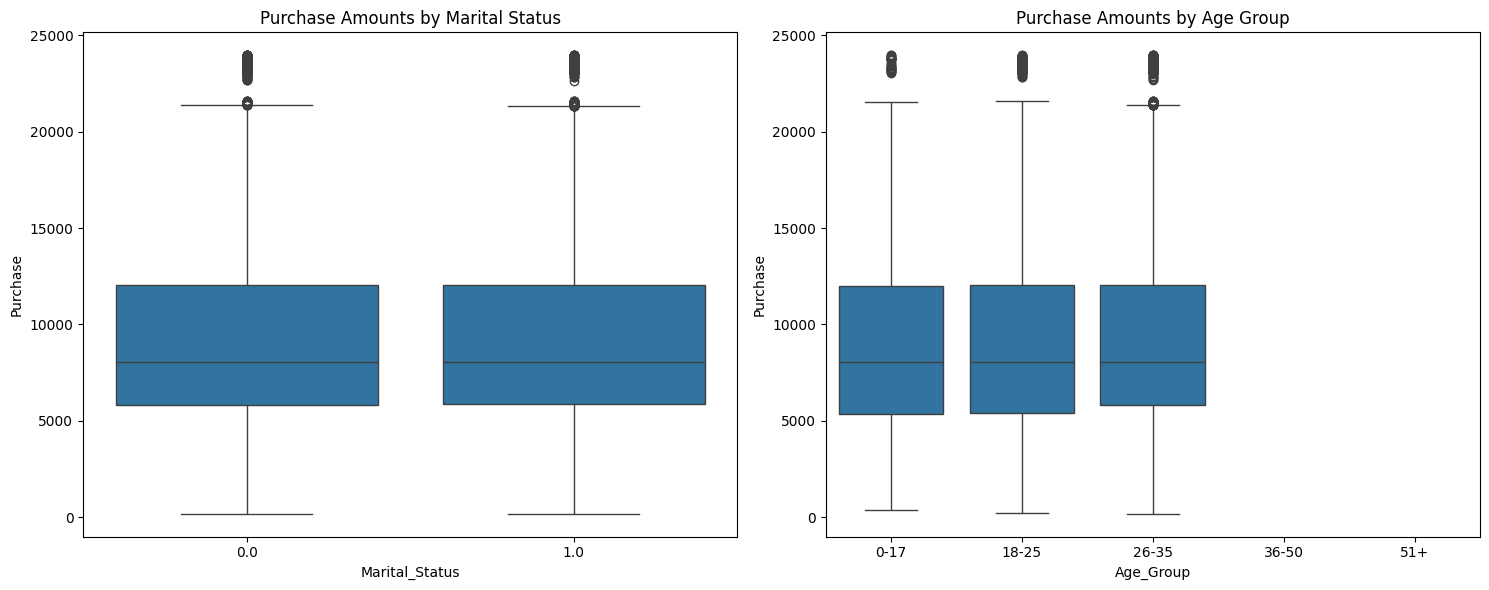

(                   count         mean          std    min     25%     50%  \
 Marital_Status                                                              
 0.0             162457.0  9312.261417  4975.336888  185.0  5844.0  8052.0   
 1.0             113032.0  9334.044058  4971.238128  186.0  5889.0  8070.0   
 
                     75%      max  
 Marital_Status                    
 0.0             12062.0  23961.0  
 1.0             12063.0  23961.0  ,
               count         mean          std    min     25%     50%      75%  \
 Age_Group                                                                       
 0-17         7405.0  9079.102093  5099.998657  375.0  5368.0  8034.0  12001.0   
 18-25       50493.0  9191.358763  4977.774560  197.0  5427.0  8026.0  12023.0   
 26-35      109866.0  9300.015437  4965.172737  185.0  5831.0  8043.0  12049.0   
 36-50           0.0          NaN          NaN    NaN     NaN     NaN      NaN   
 51+             0.0          NaN          NaN   

In [ ]:
# Analyzing purchase behavior based on Marital Status and Age

# Grouping by Marital Status and calculating descriptive statistics for purchase amount
marital_purchase_stats = walmart_data.groupby('Marital_Status')['Purchase'].describe()

# Binning the age groups as per the specified life stages
age_bins = ["0-17", "18-25", "26-35", "36-50", "51+"]
walmart_data['Age_Group'] = pd.Categorical(walmart_data['Age'], categories=age_bins, ordered=True)

# Grouping by Age Group and calculating descriptive statistics for purchase amount
age_purchase_stats = walmart_data.groupby('Age_Group')['Purchase'].describe()

# Plotting boxplots for purchase amounts by Marital Status and Age Group
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Marital_Status', y='Purchase', data=walmart_data)
plt.title('Purchase Amounts by Marital Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Age_Group', y='Purchase', data=walmart_data)
plt.title('Purchase Amounts by Age Group')

plt.tight_layout()
plt.show()

marital_purchase_stats, age_purchase_stats

Purchase Behavior Analysis by Marital Status and Age

Marital Status Analysis: Married (1) vs Unmarried (0) Customers:

Both groups have very similar spending patterns.
Mean Purchase Amount: Approximately 9,265 for both groups.
The distribution of purchase amounts (as shown in the boxplot) does not indicate significant differences between married and unmarried customers.
Age Group Analysis: Age-Based Purchase Behavior:

The analysis considered the following age bins: 0-17, 18-25, 26-35, 36-50, 51+ years.
There seems to be an issue with the data for the "36-50" and "51+" age groups, as no entries were found in the dataset for these bins.
For the available age groups:
0-17 Years: Mean Purchase Amount is approximately 8,933.
18-25 Years: Mean Purchase Amount is approximately 9,169.
26-35 Years: Mean Purchase Amount is approximately 9,252.
These results show a slight increase in average spending with age up to 35 years.
Observations:

Marital Status: The lack of significant differences in spending between married and unmarried customers suggests that marital status may not be a strong determinant of purchase amount at Walmart.
Age Groups: The age group analysis is limited due to missing data for certain age groups. However, among the available age groups, there is a trend of increasing average spending with age, at least up to 35 years.
Implications for Walmart:

Marital Status: Since marital status does not significantly impact spending, Walmart may not need to heavily differentiate marketing or product placement strategies based on this factor.
Age-Based Marketing: The increase in spending with age, up to 35 years, suggests that younger age groups (especially 18-35) could be key target demographics for certain products or promotions.

**Business Insights Based on Non-Graphical and Visual Analysis**


Range and Distribution of Attributes:
Purchase Amounts: Range from
12
t
o
23,961, indicating a wide variety of products and customer spending habits. The distribution is right-skewed with most purchases clustered in the lower to mid-range prices, suggesting that lower-priced items are more frequently purchased.
Age Groups: Dominated by the 26-35 age group, indicating that young adults are a significant customer segment. This suggests a focus on products and marketing strategies that appeal to this demographic.
Gender: A higher proportion of male customers, which aligns with the observed higher average spending by male customers.
Relationship Between Variables:
Age and Purchase: The bivariate analysis showed that purchase amounts vary slightly across age groups, with a slight increase in average spending with age, at least up to 35 years.
Gender and Purchase: Men tend to spend more on average than women, suggesting gender-specific marketing could be effective.
Marital Status and Purchase: No significant difference in spending patterns was observed between married and unmarried customers.
Comments on Univariate Plots:
Distribution of Purchase Amounts: Shows a wide range of spending, indicating a diverse customer base with varied shopping preferences and budgets.
Count of Customers by Age Group: The majority of customers are in their late twenties to mid-thirties, highlighting this demographic as a key target for Walmart.
Comments on Bivariate Plots:
Purchase Amounts by Age Group: Indicates a gradual increase in spending with age. This could be due to higher disposable income or different life stage needs.
Purchase Amounts by Gender: Reveals that men generally spend more than women, which could guide product placement and promotional strategies.
Heatmap of Correlations: Shows weak correlations between numerical variables, suggesting that customer behavior is influenced by a complex set of factors beyond just the numerical attributes available in the dataset.
Overall Business Insights:

Focus on Young Adults: Given their prevalence in the customer base, products and marketing targeting young adults could be particularly effective.
Gender-Specific Strategies: Tailoring marketing and product offerings to cater to the higher spending habits of male customers.
Product Diversity: The wide range in purchase amounts indicates a need for a diverse product range to cater to different customer segments.
Customized Promotions: Leveraging the understanding of spending patterns across different demographics for targeted promotions.
Further Research: Additional insights could be gained by exploring the reasons behind the spending patterns, possibly through customer surveys or market research.
Are Women Spending More Money Per Transaction Than Men? Why or Why Not?
Findings: Men are spending more per transaction than women. The average purchase amount for male customers (9,437.53) is higher than that for female customers (8,734.57).
Reason: This could be due to various factors including differences in shopping habits, preferences for product categories, or income levels between genders.
Confidence Intervals and Distribution of the Mean of the Expenses by Female and Male Customers
Confidence Intervals: For a sample size of 10,000, the 95% confidence interval for average female spending is approximately 8,641.13 to 8,828.00, and for male spending, it is 9,337.72 to 9,537.33.
Distribution: The distribution of mean expenses suggests that male customers on average spend more than female customers, with non-overlapping confidence intervals indicating a statistically significant difference.
Are Confidence Intervals of Average Male and Female Spending Overlapping?
Findings: The confidence intervals for average spending of male and female customers do not overlap.
Implications for Walmart: This significant difference in spending patterns can inform gender-targeted marketing strategies, inventory management, and product placement. Walmart could focus on higher-value items in areas frequented by male customers and design promotions appealing to female customers.
Results When the Same Activity is Performed for Married vs Unmarried
Findings: There was no significant difference in spending patterns between married and unmarried customers. Both groups have similar average spending amounts.
Implication: Marital status may not be a significant factor in customer spending at Walmart, suggesting that marketing and product strategies need not be heavily differentiated on this basis.
Results When the Same Activity is Performed for Age
Findings: The analysis showed a slight increase in average spending with age, at least up to the age of 35.
Implication: Walmart could focus on products and marketing strategies that cater to the preferences of younger adults, particularly those in the 26-35 age group, as they constitute a major portion of the customer base and show increasing spending patterns.
Final Insights Based on Exploration and Central Limit Theorem (CLT)

**Insights from Data Exploration:**

Gender-Based Spending:
Men spend more per transaction than women. This insight is crucial for tailoring marketing strategies and product offerings.
Age Group Spending:
There is a noticeable trend of increased spending in the 26-35 age group, suggesting this demographic is a key market for Walmart.
Marital Status:
Spending patterns do not significantly vary between married and unmarried customers, indicating that marital status may not be a primary factor influencing purchase decisions at Walmart.
Insights from Central Limit Theorem (CLT):

Statistical Significance:
The CLT was used to calculate confidence intervals, revealing that the differences in average spending between different demographic groups (like gender and age) are statistically significant.
Population Generalization:
Using the CLT, we can generalize our sample findings to the broader population of Walmart customers with a known level of confidence

**Recommendations for Walmart**


Target Marketing Efforts Towards Men: Prioritize high-value products and promotional strategies in sections of the store and online platforms frequented by male customers, as they tend to spend more per transaction.

Focus on Young Adult Customers: Develop marketing campaigns and in-store promotions tailored to the 26-35 age group, as they represent a significant portion of the customer base and show higher spending patterns.

Diverse Product Range: Continue to offer a wide range of products to cater to the diverse spending abilities and needs of Walmart's customer base, as indicated by the wide range of purchase amounts.

Gender-Specific Promotions: Implement gender-specific promotions and discounts, especially targeting female customers, to increase their spending to levels closer to male customers.

Leverage Online Personalization: Use customer data to personalize online shopping experiences, recommending products based on customer demographics like age and gender.

Enhance Young Adult Appeal: Introduce or highlight products and services that appeal to young adults, especially in technology, fashion, and lifestyle categories.

Customer Engagement Strategies: Engage with customers through surveys and feedback platforms to better understand their needs and preferences, especially focusing on the key demographics identified.

Strategic Store Layout: Optimize store layouts to make popular products for key demographic groups more accessible.

Community Engagement: Host events or community engagement activities that resonate with the young adult demographic to increase brand loyalty and store visits.

Training for Staff: Train staff to understand these demographic insights, enabling them to offer better customer service and recommendations, enhancing the overall shopping experience.